In [1]:
# encoding=utf-8
import numpy as np
from scipy import sparse
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from sklearn import svm
from sklearn import neighbors
from sklearn import tree  
from sklearn import metrics
from sklearn import preprocessing
import math
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

In [2]:
label_all = pd.read_csv("./data/label_all.csv")
label_a1 = label_all['SY']
label_a2 = label_all['TY']
S_Y_A = label_a1.values
T_Y_A = label_a2.values
label = pd.read_csv("./data/label_select.csv")
label1 = label['SY']
label2 = label['TY']
S_Y = label1.values
T_Y = label2.values
features_all = pd.read_csv("./data/feature_all.csv")
features_a = features_all.values
S_X_A = features_a[:,0:4]
T_X_A = features_a[:,4:8]
features_select = pd.read_csv("./data/feature_select.csv")
features = features_select.values
S_X = features[:,0:4]
T_X = features[:,4:8]
ss_X = StandardScaler()
S_X = ss_X.fit_transform(S_X)
T_X = ss_X.transform(T_X)
T_X_A = ss_X.transform(T_X_A)
S_X_A = ss_X.transform(S_X_A)

In [3]:
d={1:'b',
   2:'g',
   3:'c',
   4:'r',
   5:'black',
   6:'orange'
}

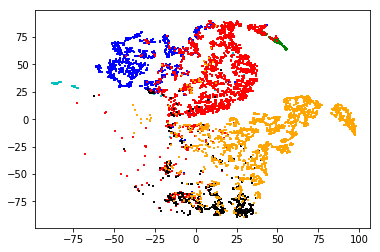

In [4]:
tsneXs=TSNE(n_components=2).fit_transform(S_X_A)
tsneXYs=np.hstack((tsneXs,S_Y_A.reshape(-1,1)))
df_tsneXYs= pd.DataFrame({'one':tsneXYs[:,0],'two':tsneXYs[:,1],'label':tsneXYs[:,2]})
for i in [1,2,3,4,5,6]:
    plt.scatter(df_tsneXYs[['one']][df_tsneXYs.label==i],
                df_tsneXYs[['two']][df_tsneXYs.label==i],
                s=1,marker=',',c=d.get(i))
#plt.axis([-2,5,-2,7])
plt.show()

In [5]:
features_all.iloc[:,0:4].corr()

,S1,S2,S3,S4
S1,1.000000,0.836657,0.698446,0.211712
S2,0.836657,1.000000,0.925594,0.230946
S3,0.698446,0.925594,1.000000,0.064261
S4,0.211712,0.230946,0.064261,1.000000


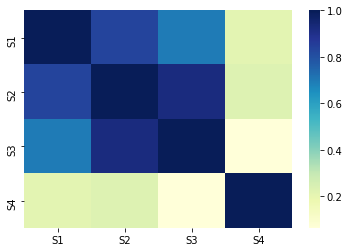

In [6]:
sns.heatmap(features_all.iloc[:,0:4].corr(),cmap='YlGnBu')

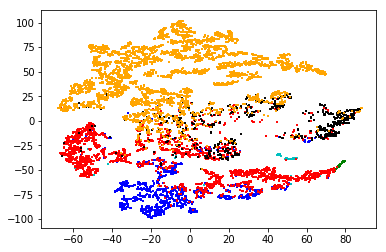

In [7]:
tsneXt=TSNE(n_components=2).fit_transform(T_X_A)
tsneXYt=np.hstack((tsneXt,T_Y_A.reshape(-1,1)))
df_tsneXYt= pd.DataFrame({'one':tsneXYt[:,0],'two':tsneXYt[:,1],'label':tsneXYt[:,2]})
for i in [1,2,3,4,5,6]:
    plt.scatter(df_tsneXYt[['one']][df_tsneXYt.label==i],
                df_tsneXYt[['two']][df_tsneXYt.label==i],
                s=1,marker=',',c=d.get(i))
#plt.axis([-2,5,-2,7])
plt.show()

In [8]:
features_all.iloc[:,4:8].corr()

,T1,T2,T3,T4
T1,1.000000,0.860946,0.806365,-0.207083
T2,0.860946,1.000000,0.960984,-0.180607
T3,0.806365,0.960984,1.000000,-0.329398
T4,-0.207083,-0.180607,-0.329398,1.000000


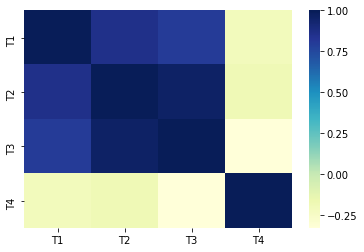

In [9]:
sns.heatmap(features_all.iloc[:,4:8].corr(),cmap='YlGnBu')